In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [20]:
africa = pd.read_csv("africa.csv")
n_countries = len( africa )

In [21]:
africa

,Country,IMR,Literacy
0,Algeria,26,89
1,Angola,96,66
2,Benin,68,45
3,Botswana,20,97
4,Burkina Faso,82,33
5,Burundi,86,78
6,Cameroon,79,77
7,Cape Verde,18,99
8,Central African Republic,108,58
9,Chad,97,41


<AxesSubplot:xlabel='Literacy', ylabel='IMR'>

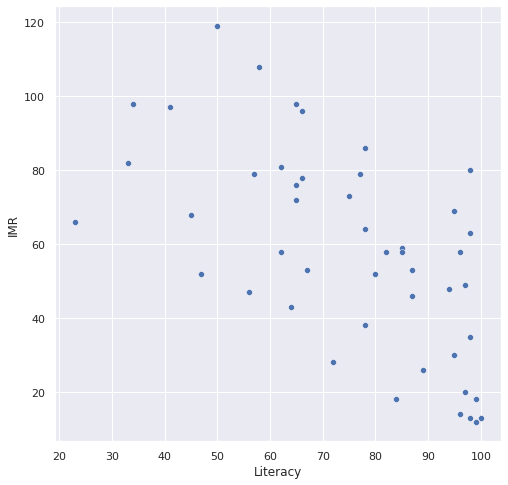

In [22]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")

In [53]:
x_bar = np.mean( africa.Literacy )
x_bar

74.95744680851064

In [54]:
y_bar = np.mean( africa.IMR )
y_bar

58.1063829787234

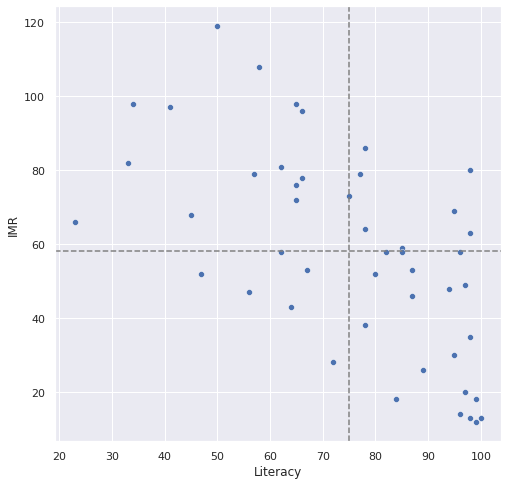

In [55]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
plt.axvline( x_bar, linestyle='--', color="gray")
plt.axhline( y_bar, linestyle='--', color="gray")

In [56]:
africa_r = africa.Literacy.corr( africa.IMR )
africa_r

-0.616221949960677

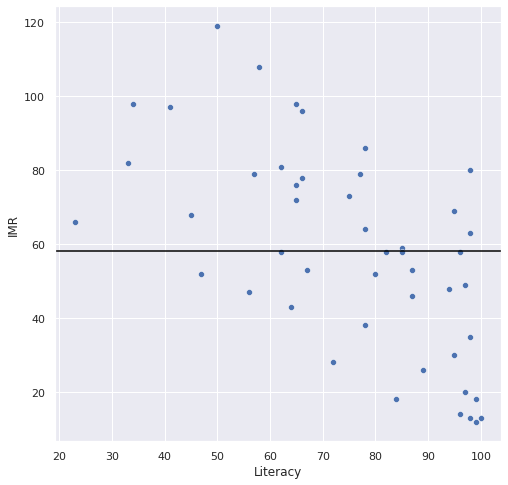

In [57]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# null model:
plt.axhline( y_bar, color="black")

In [58]:
africa_tss = np.sum( np.square(africa.IMR - y_bar) )
africa_tss

34308.46808510638

In [63]:
africa.IMR.var()

745.836262719704

In [64]:
(n_countries - 1)*africa.IMR.var()

34308.46808510638

In [65]:
s_x = africa.Literacy.std()
s_x

20.512941245879194

In [66]:
s_y = africa.IMR.std()
s_y

27.31000297912294

Text(0.5, 1.0, 'SD line')

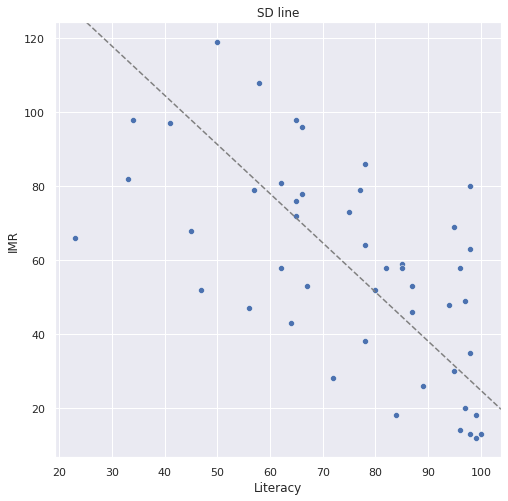

In [49]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# SD line
plt.axline( (x_bar,y_bar), slope = -s_y / s_x, linestyle='--', color="gray")
plt.title("SD line")

In [67]:
m = africa_r*(s_y/s_x)
m

-0.8204100566323119

In [68]:
b = y_bar - m*x_bar
b

119.60222615990713

Text(0.5, 1.0, 'Line of best fit')

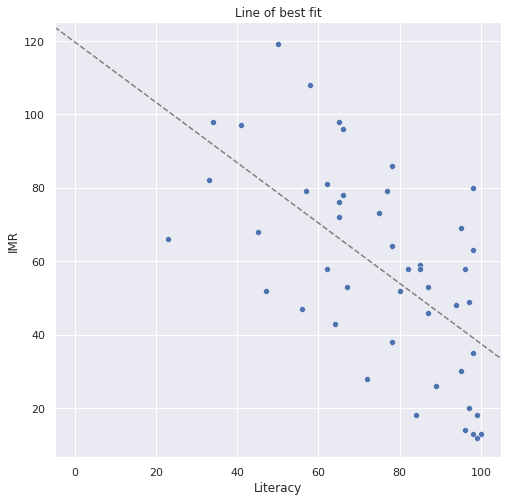

In [69]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# SD line
plt.axline( (0,b), slope = m, linestyle='--', color="gray")
plt.title("Line of best fit")

In [70]:
africa_model = smf.ols('IMR ~ Literacy', data = africa)

In [71]:
africa_fit = africa_model.fit()

In [72]:
print( africa_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                    IMR   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     27.55
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           4.00e-06
Time:                        17:24:35   Log-Likelihood:                -210.40
No. Observations:                  47   AIC:                             424.8
Df Residuals:                      45   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.6022     12.138      9.853      0.0

In [75]:
africa_rss = np.sum( np.square( africa_fit.resid ) )
africa_rss

21280.530941116467

In [78]:
africa_fit.mse_total

745.836262719704

In [84]:
# estimate of sigma
np.sqrt( africa_fit.mse_total )

27.31000297912294

In [83]:
africa_fit.ssr

21280.530941116467